# CLUSTERMAP
- Matrix plot
- Heatmap and clusterings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
toy_data_dict = {
    'Name': ['Andy', 'Ben', 'Claire', 'David'],
    'Hours_Studied': [10, 20, 12, 28],
    'Score': [15, 20, 16, 25],
    'Street_Address': [11, 24, 18, 9]
}

toy_data = pd.DataFrame(toy_data_dict)
toy_data.set_index('Name', inplace=True)

toy_data

,Hours_Studied,Score,Street_Address
Name,,,
Andy,10,15,11
Ben,20,20,24
Claire,12,16,18
David,28,25,9


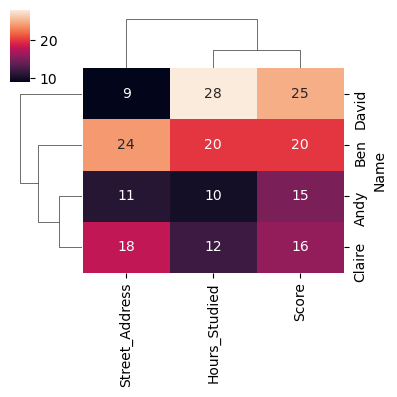

In [3]:
sns.clustermap(data=toy_data, figsize=(4,4), annot=True);

### The protrusions to the top and left of the heatmap are called dendograms. They are how sns has clustered our data. They show how close the column and row vectors are to each other. Hence the reordering of rows and cols.
- To produce the dendograms sns uses Hierarchical Agglomerative Clustering
- The idea is to one by one form clusters with the closest elements and then keep growing the cluster till there is only 1 left
- The order of merging forms the dendograms
- The larger the height of the dendograms, the more the distance b/w the points

In [7]:
penguins = sns.load_dataset('penguins')

In [8]:
penguins.head(n=3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [11]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [12]:
penguins.dropna(inplace=True)

In [14]:
penguins_numerical = penguins.select_dtypes('float')

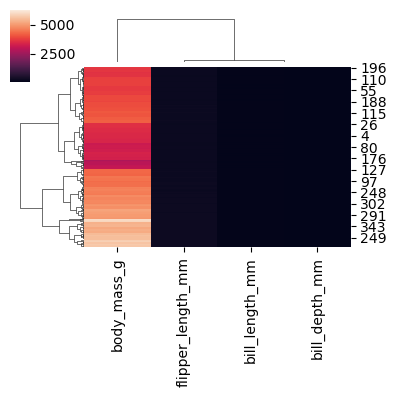

In [19]:
sns.clustermap(penguins_numerical, figsize=(4,4));

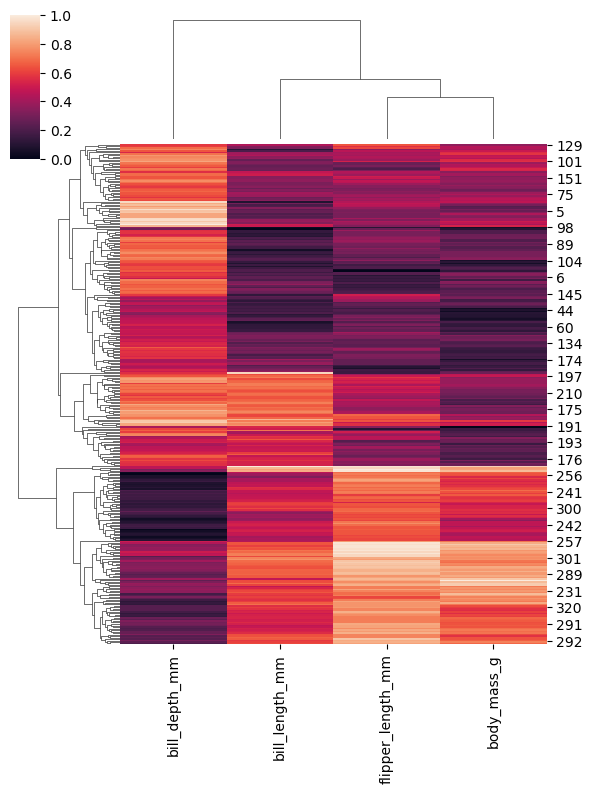

In [24]:
sns.clustermap(data=penguins_numerical, standard_scale=1, figsize=(6,8));
#standard scale applies a standard 0 to 1 scale, arguement is axes
# observation: bodymass and flipper length show nearer 
# than bill length, with bill depth being the farthest away

### Hierarchical Agglomerative Clustering
HAC considers two imp properties to find these clusters.
- Metric
  - The distance metric b/w points and b/w clusters
  - Default: Euclidean - Everyday Spatial Distance
  - We can switch it to some other preference like Manhattan Distance, Cosine Distance, etc.
- Linkage
  - Single Linkage - Distance of a point/cluster compared to the closest cluster point
  - Complete Linkage - Distance of a point/cluster compared to the furthest cluster point

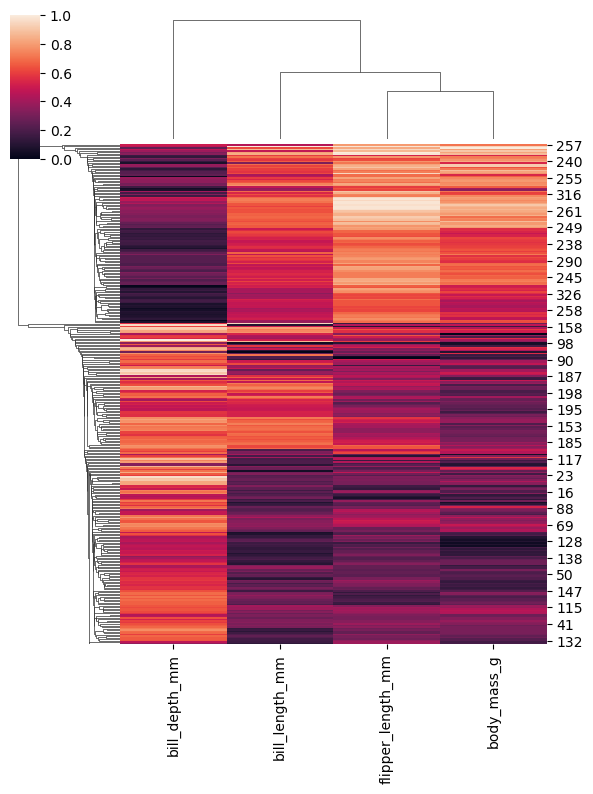

In [29]:
sns.clustermap(data=penguins_numerical, figsize=(6,8), standard_scale=1, method='single');
#the default method will compute mean of distances
#changing it to single, since it has to find the minimum distance from the closest cluster point, it will use 'min' to do so instead of mean
#see the dendograms elongated in the single method with longer linkages
#sns leverages scipy/fastcluster in the backend

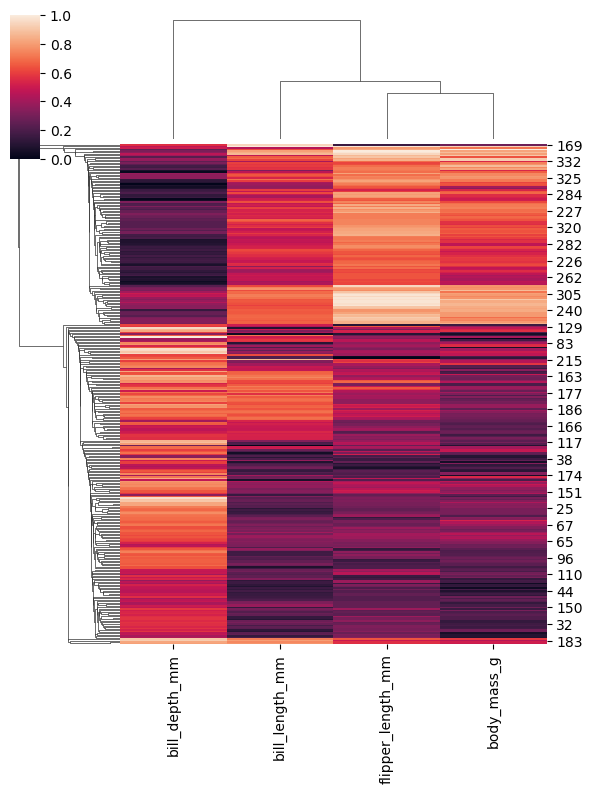

In [30]:
sns.clustermap(data=penguins_numerical, figsize=(6,8), standard_scale=1, method='single', metric='cityblock');
#metric cityblock uses manhattan distance metric which calculates distance in perpendicular block style fashion

In [31]:
species_colors = penguins.species.map(dict(Adelie='blue', Chinstrap='red', Gentoo='green'))

In [32]:
species_colors[:5]

0    blue
1    blue
2    blue
4    blue
5    blue
Name: species, dtype: object

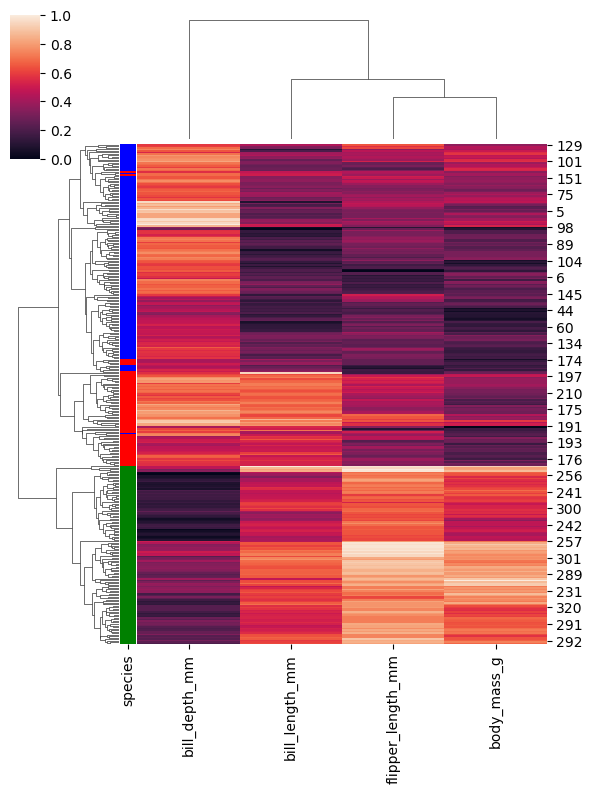

In [35]:
sns.clustermap(
    data = penguins.select_dtypes('float'),
    standard_scale=1,
    method='average',
    metric='euclidean',
    row_colors=species_colors,
    figsize=(6,8)
);
#Categorical feature can be added as a dimension by defining row_colors which should have a value for each row in the dataset